In [1]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sim = rebound.Simulation()
sim.units = ('AU', 'yr', 'Msun')
sim.add("Sun")
sim.add("Jupiter")

sim.integrator = "whfast"
sim.dt = .01

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


In [3]:
for j in range (10):
    for i in range (10):
        mass=1e-29
        radius=2.5+0.1*j
        omega=(2*np.pi)/10*i
        sim.add(m=mass,a=radius,omega=omega)

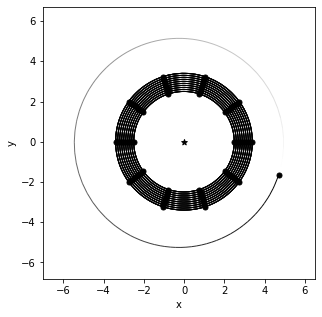

In [4]:
fig = rebound.OrbitPlot(sim)

In [ ]:
sim.status()

In [5]:
years = 10000
time = years
sim.exit_max_distance = 50.
for i in range (years):

    clear_output(wait=True)
    print(i)
    try:
        sim.integrate(i*2.*np.pi)  
    except rebound.Escape as error:
        print(error)
        for j in range(sim.N):
            p = sim.particles[j]
            d2 = p.x*p.x + p.y*p.y + p.z*p.z
            if d2>sim.exit_max_distance**2:
                index=j # cache index rather than remove here since our loop would go beyond end of particles array
        sim.remove(index=index)

    

7724
